Yurag, Marivient Alexia R.

BSCS - IS - 4B

**Machine Problem 5: Object Detection and Recognition using YOLO**

Tasks:
1. Model Loading: Use TensorFlow to load a pre-trained YOLO model.

2. Image Input: Select an image that contains multiple objects.

3. Object Detection: Feed the selected image to the YOLO model to detect various objects within it.

4. Visualization: Display the detected objects using bounding boxes and class labels.

5. Testing: Test the model on at least three different images to compare its performance and observe its accuracy.

6. Performance Analysis: Document your observations on the model's speed and accuracy, and discuss how YOLO’s single-pass detection impacts its real-time capabilities.


In [ ]:
!pip install ultralytics


0: 448x640 4 persons, 21 cars, 2 buss, 3 trucks, 153.4ms
Speed: 3.5ms preprocess, 153.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Inference Time for traffic.jpg: 0.2568 seconds
Number of Detected Objects in traffic.jpg: 30


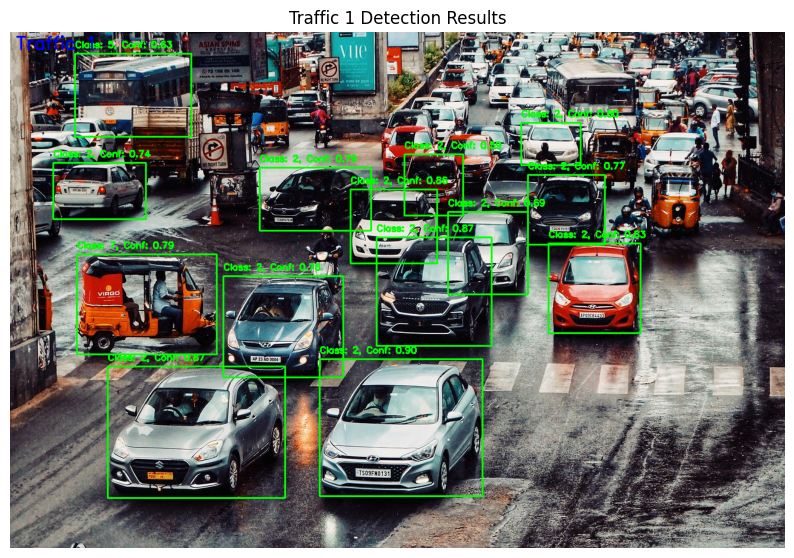


0: 384x640 18 cars, 2 buss, 2 trucks, 1 traffic light, 227.5ms
Speed: 7.2ms preprocess, 227.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Inference Time for traffic 1.jpg: 0.2436 seconds
Number of Detected Objects in traffic 1.jpg: 23


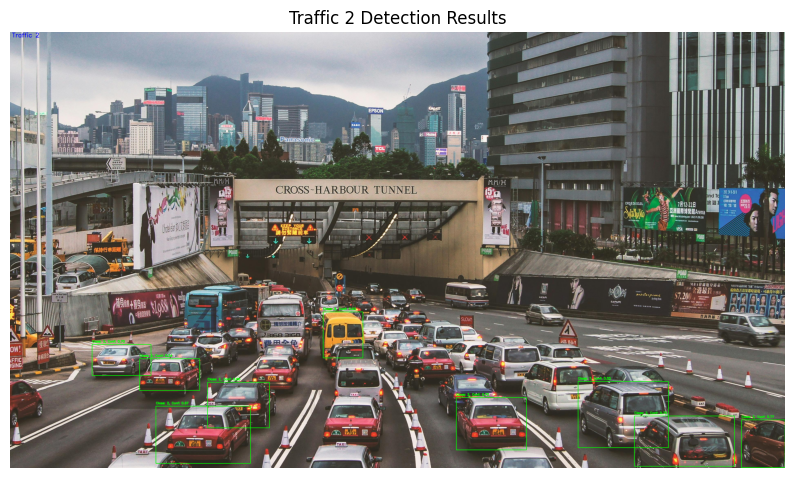


0: 448x640 15 cars, 1 bus, 1 truck, 174.7ms
Speed: 6.6ms preprocess, 174.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Inference Time for traffic 2.jpg: 0.1933 seconds
Number of Detected Objects in traffic 2.jpg: 17


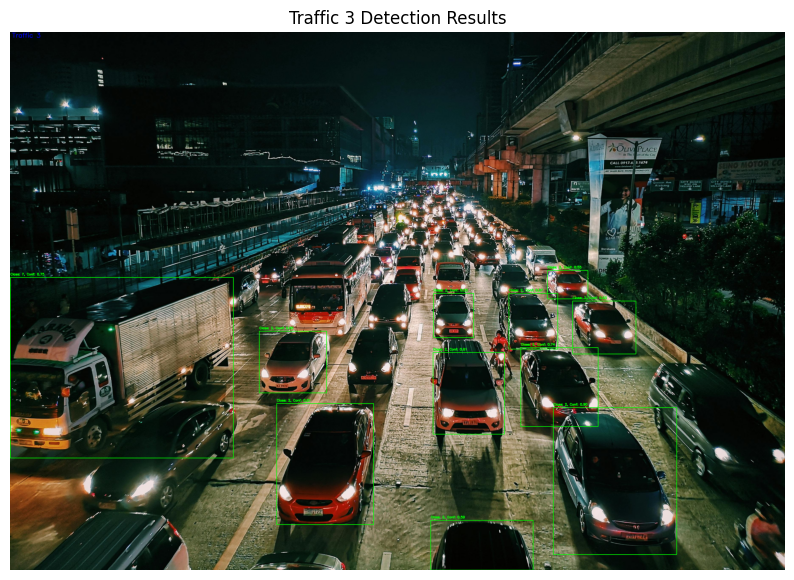

In [10]:
import cv2  # OpenCV for image processing
import time  # Time module to measure inference time
import matplotlib.pyplot as plt  # Matplotlib for displaying images
from ultralytics import YOLO  # Import the YOLO class from the ultralytics package

# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

# List of image paths to test and their corresponding labels
image_paths = ['traffic.jpg', 'traffic 1.jpg', 'traffic 2.jpg']
labels = ['Traffic 1', 'Traffic 2', 'Traffic 3']

# Function to perform object detection, measure performance, and display images
def analyze_performance(image_path, label):
    # Load an image from the specified path
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    # Measure the inference time for object detection
    start_time = time.time()  # Start timer
    results = model(image)  # Perform object detection
    end_time = time.time()  # End timer

    # Calculate the time taken for inference
    inference_time = end_time - start_time
    print(f"Inference Time for {image_path}: {inference_time:.4f} seconds")

    # Initialize a counter for detected objects
    detected_objects = 0
    # Process the detection results
    for result in results:
        boxes = result.boxes  # Get the bounding boxes from the detection results
        detected_objects += len(boxes)  # Count the number of detected boxes

        # Iterate through each detected box
        for box in boxes:
            # Get bounding box coordinates and confidence score
            x1, y1, x2, y2 = box.xyxy[0].numpy()
            conf = box.conf[0].item()  # Get the confidence score
            class_id = int(box.cls[0].item())  # Get the class ID

            # Filter out low confidence detections
            if conf > 0.5:
                # Draw bounding box and label on the image
                cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                cv2.putText(image, f"Class: {class_id}, Conf: {conf:.2f}",
                            (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Output the number of detected objects
    print(f"Number of Detected Objects in {image_path}: {detected_objects}")

    # Adding a label to the top-left corner of the image
    cv2.putText(image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the image with detections using matplotlib
    plt.figure(figsize=(10, 10))  # Set figure size for the plot
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide the axis
    plt.title(f'{label} Detection Results')  # Set the title of the plot
    plt.show()  # Show the plot

# Analyze performance for each image with corresponding labels
for img_path, label in zip(image_paths, labels):
    analyze_performance(img_path, label)